In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import torch
import pickle
import pandas as pd
from src.problem import Instance

In [40]:
with open('../xae9giql_preds_val.pkl', 'rb') as f:
    preds = pickle.load(f)

df = pd.DataFrame(preds)
# df['x_hat'] = df['x_hat'].map(lambda t: t.numpy())
df['conf'] = df['x_hat'].map(lambda x: np.where(x > 1-x, x, 1-x))

df.head()

,fp,size,x_hat,vars_names,conf
0,data/raw/125_24_11.json,24,"[0.42465189642636414, 0.5862517686778455, 0.63...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.5753481035736359, 0.5862517686778455, 0.635..."
1,data/raw/125_24_1.json,24,"[0.012311888556895552, 0.0016373210236957823, ...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.9876881114431044, 0.9983626789763043, 0.999..."
2,data/raw/125_24_8.json,24,"[0.0072029595888110885, 0.002002296465819941, ...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.9927970404111889, 0.99799770353418, 0.99837..."
3,data/raw/125_22_18.json,22,"[0.22522565279015727, 0.2687286155876834, 0.49...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.7747743472098427, 0.7312713844123166, 0.504..."
4,data/raw/125_24_3.json,24,"[0.3450859956863011, 0.42358615700693814, 0.33...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.654914004313699, 0.5764138429930619, 0.6658..."


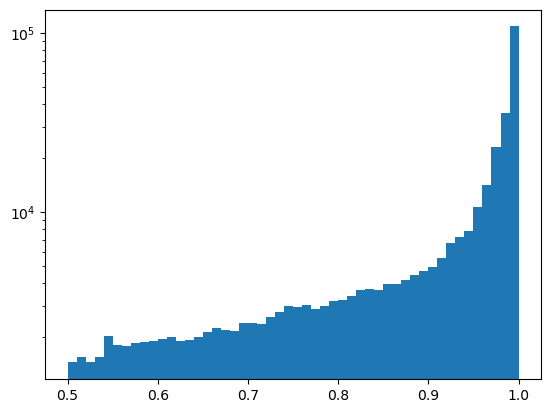

In [51]:
all_confs = np.hstack(df['conf'].values)

plt.hist(all_confs, bins=50)
plt.yscale('log')
plt.show()